### Categorical Data Analysis (Assignment 2)

In [4]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [5]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
        ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary']
adult_data = pd.read_csv('adult.data.txt', names = cols)

* Q1. Observe random 10 rows of data from the dataset

In [23]:
adult_data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
3911,61,Private,166124,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
8220,48,Private,125120,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,37,United-States,<=50K
13539,39,Self-emp-not-inc,190023,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,<=50K
2007,24,Private,296045,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,2635,0,38,United-States,<=50K
16412,42,Private,172148,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,Black,Male,0,0,40,United-States,<=50K
11683,47,Self-emp-not-inc,177457,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,40,United-States,<=50K
31850,54,Private,24108,Some-college,10,Separated,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
16780,37,Private,177858,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Male,2174,0,40,United-States,<=50K
588,52,Private,25826,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,47,United-States,>50K
14358,34,Private,66309,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,United-States,<=50K


* Q2. Check if there are missing values in the dataset. Hint : '?' can be treated as missing values

In [18]:
for col in adult_data.columns:
    adult_data[col] = adult_data[col].replace('?','NaN')

* Q3. Identify all the categorical columns

In [24]:
cat_adult_data = adult_data.select_dtypes(include=['object'])
cat_adult_data

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


* Q4. Show one way frequency tables for marital-status, occupation & relationship

In [37]:
adult_data['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [38]:
adult_data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [36]:
adult_data['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

* Q5. Show two way table or contingency table (crosstab) for education & salary. Add percentage margins

In [43]:
pd.crosstab(adult_data['education'],adult_data['Salary'],margins = True, margins_name = 'Percentage',normalize='all').round(2)

Salary,<=50K,>50K,Percentage
education,,,
10th,0.03,0.00,0.03
11th,0.03,0.00,0.04
12th,0.01,0.00,0.01
1st-4th,0.00,0.00,0.01
5th-6th,0.01,0.00,0.01
7th-8th,0.02,0.00,0.02
9th,0.01,0.00,0.02
Assoc-acdm,0.02,0.01,0.03
Assoc-voc,0.03,0.01,0.04


* Q6. Show two way table for education & marital-status. Add margins

In [50]:
table = pd.crosstab(adult_data['education'],adult_data['marital-status'],margins = True)

* Q7. Show three way table for education, marital-status & salary

In [47]:
pd.crosstab(adult_data['education'],[adult_data['marital-status'],adult_data['Salary']])

marital-status  Divorced        Married-AF-spouse        Married-civ-spouse  \
Salary             <=50K  >50K              <=50K  >50K               <=50K   
education                                                                     
 10th                118     2                  0     0                 294   
 11th                122     8                  0     0                 310   
 12th                 37     2                  0     0                 101   
 1st-4th              10     0                  0     0                  75   
 5th-6th              20     0                  0     0                 157   
 7th-8th              73     0                  0     0                 324   
 9th                  61     3                  0     0                 210   
 Assoc-acdm          187    16                  2     0                 234   
 Assoc-voc           210    24                  0     1                 373   
 Bachelors           419   127                  0     4                 913   
 Doctorate            11    22                  0     0                  47   
 HS-grad            1531    82                 10     3                3336   
 Masters             158    75                  0     0                 229   
 Preschool             1     0                  0     0                  20   
 Prof-school          28    27                  0     0                  66   
 Some-college        994    75                  1     2                1595   

marital-status        Married-spouse-absent        Never-married        \
Salary          >50K                  <=50K  >50K          <=50K  >50K   
education                                                                
 10th             55                     15     0            358     3   
 11th             44                     19     0            580     6   
 12th             29                      8     0            231     1   
 1st-4th           6                     12     0             39     0   
 5th-6th          15                     20     0             88     1   
 7th-8th          35                     13     1            110     3   
 9th              20                      9     0            153     2   
 Assoc-acdm      226                     12     0            320    17   
 Assoc-voc       316                     13     0            347    15   
 Bachelors      1855                     55    13           1613   182   
 Doctorate       239                      4     3             38    35   
 HS-grad        1509                    116     5           3043    46   
 Masters         774                     12     5            319    85   
 Preschool         0                      4     0             22     0   
 Prof-school     346                      2     1             51    42   
 Some-college   1223                     70     6           2880    53   

marital-status  Separated        Widowed        
Salary              <=50K  >50K    <=50K  >50K  
education                                       
 10th                  48     1       38     1  
 11th                  48     0       36     2  
 12th                  14     0        9     1  
 1st-4th                9     0       17     0  
 5th-6th               18     0       14     0  
 7th-8th               23     0       63     1  
 9th                   33     0       21     2  
 Assoc-acdm            27     3       20     3  
 Assoc-voc             40     2       38     3  
 Bachelors             76    16       58    24  
 Doctorate              3     4        4     3  
 HS-grad              399     7      391    23  
 Masters               14    11       32     9  
 Preschool              1     0        3     0  
 Prof-school            2     6        4     1  
 Some-college         204    16      160    12

* Q8. Do Chi-Square Test of Association for table generated on question 6

In [51]:
chi2_contingency(table)

(1638.1373573227852,
 2.7674290822463824e-269,
 112,
 array([[1.27309327e+02, 6.59039956e-01, 4.29120973e+02, 1.19773348e+01,
         3.06109733e+02, 2.93702589e+01, 2.84533337e+01, 9.33000000e+02],
        [1.60330610e+02, 8.29980652e-01, 5.40425663e+02, 1.50839962e+01,
         3.85507970e+02, 3.69882682e+01, 3.58335125e+01, 1.17500000e+03],
        [5.90835355e+01, 3.05856700e-01, 1.99152606e+02, 5.55861306e+00,
         1.42063788e+02, 1.36305703e+01, 1.32050306e+01, 4.33000000e+02],
        [2.29238660e+01, 1.18669574e-01, 7.72693713e+01, 2.15669052e+00,
         5.51194374e+01, 5.28853536e+00, 5.12342987e+00, 1.68000000e+02],
        [4.54383772e+01, 2.35220049e-01, 1.53158932e+02, 4.27486871e+00,
         1.09254599e+02, 1.04826326e+01, 1.01553699e+01, 3.33000000e+02],
        [8.81477227e+01, 4.56312767e-01, 2.97119130e+02, 8.29298854e+00,
         2.11947360e+02, 2.03356777e+01, 1.97008077e+01, 6.46000000e+02],
        [7.01361138e+01, 3.63072387e-01, 2.36407481e+02, 6.598445

* Q9. Try to find out if there is a relation between salary & education

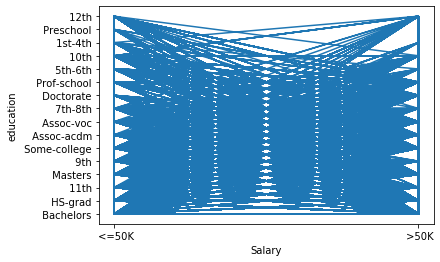

In [6]:
plt.plot(adult_data["Salary"], adult_data["education"])
plt.xlabel("Salary")
plt.ylabel("education")
plt.show()

* Q10. Does hard-work really mean higher salary

In [7]:
adult_data.groupby('Salary')['hours-per-week'].mean()

Salary
 <=50K    38.840210
 >50K     45.473026
Name: hours-per-week, dtype: float64